## Observations and Insights 

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.patches as mpatches
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_mouse_study_results_df = pd.DataFrame(combined_mouse_study_results)

# Display the data table for preview
# combined_mouse_study_results.info()
combined_mouse_study_results_df.head(3)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [196]:
# Checking the number of mice.
combined_mouse_study_results_df["Mouse ID"].count()

1893

In [197]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [198]:
# Optional: Get all the data for the duplicate mouse ID. 


In [199]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results_data = combined_mouse_study_results_df.drop_duplicates("Mouse ID", keep='last')
clean_mouse_study_results_data_df = pd.DataFrame(clean_mouse_study_results_data).reset_index(drop=True)
clean_mouse_study_results_data_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0


In [200]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_results_data_df['Mouse ID'])

249

## Summary Statistics

###### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.This method is the most straighforward, creating multiple series and putting them all together at the end.


In [201]:
drug_and_tumor = clean_mouse_study_results_data_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_tumor = drug_and_tumor.set_index("Drug Regimen")
drug_and_tumor.head()

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,22.050126
Capomulin,23.343598
Capomulin,28.484033
Capomulin,28.430964
Ramicane,29.128472


In [202]:
mean = drug_and_tumor.groupby(level=0).mean()
mean = mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
# mean

In [203]:
median = drug_and_tumor.groupby(level=0).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median"})
# median

In [204]:
variance = drug_and_tumor.groupby(level=0).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Variance"})
# variance

In [205]:
std = drug_and_tumor.groupby(level=0).std()
std = std.rename(columns={"Tumor Volume (mm3)": "std"})
# std

In [206]:
sem = drug_and_tumor.groupby(level=0).sem()
sem = sem.rename(columns={"Tumor Volume (mm3)": "sem"})
# sem

In [207]:
summary_statistics_01_df = pd.concat([ mean, median,variance,std,sem],join='outer', axis=1)
summary_statistics_01_df

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

In [209]:
summary_statistics_2_df = clean_mouse_study_results_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var", "std","sem"]).reset_index()

In [210]:
summary_statistics_2_df.set_index("Drug Regimen")

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

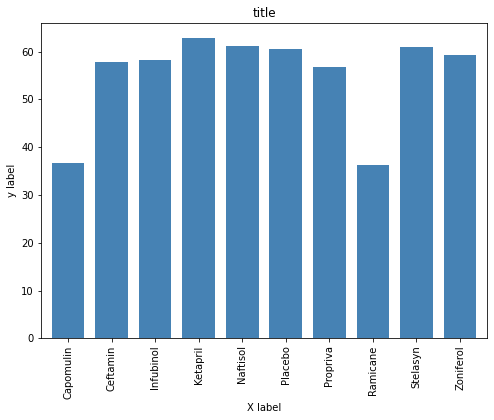

<Figure size 432x288 with 0 Axes>

In [293]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mince_number_and_drug = summary_statistics_2_df[["Drug Regimen","mean"]]
mince_number_and_drug = mince_number_and_drug.set_index("Drug Regimen")
# mince_number_and_drug.head()

mince_number_and_drug.plot(kind="bar",legend=False,width=0.75,figsize=(8,5.8),color='steelblue')
plt.title("title")
plt.xlabel("X label")
plt.ylabel("y label")

plt.show()
plt.tight_layout()

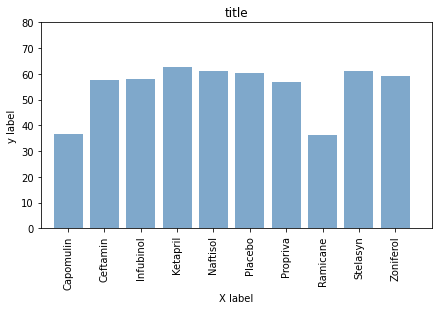

In [294]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(summary2_statistics_tumor_volume_gb))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, summary2_statistics_tumor_volume_gb["mean"], color='steelblue', alpha=0.69, align="center")
plt.xticks(tick_locations, summary2_statistics_tumor_volume_gb["Drug Regimen"], rotation="vertical")
plt.tight_layout()

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 80)

plt.title("title")
plt.xlabel("X label")
plt.ylabel("y label")

plt.show()

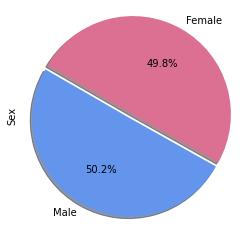

<Figure size 432x288 with 0 Axes>

In [310]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_mouse_study_results_data_df["Sex"].value_counts().plot(kind='pie',
                                                             autopct='%1.1f%%',
                                                             shadow=True, 
                                                             explode=(0,0.05),
                                                             startangle=150, 
                                                             fontsize=10,
                                                            legend=False,
                                                            figsize=(4,4),
                                                            colors = ['cornflowerblue', 'palevioletred'] )
plt.title("")

plt.axis("equal")

plt.show()
plt.tight_layout()



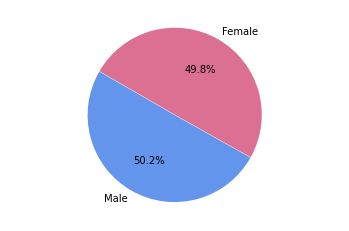

<Figure size 288x288 with 0 Axes>

In [312]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("")
labels = ["Male", "Female"]
male_and_female = clean_mouse_study_results_data_df[["Mouse ID","Sex"]]
male_and_female = male_and_female.set_index("Mouse ID")

males_fameles_count = male_and_female.value_counts()
males_fameles_count = male_and_female.value_counts()

colors = ['cornflowerblue', 'palevioletred']

explode = (0, 0.005)
plt.axis("equal")

plt.pie(males_fameles_count,explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=150)
plt.figure(figsize=(4, 4))


plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [265]:
# quartiles = DATAFRAME["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range is: {iqr}")
# print(f"The the median  is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
